In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [6]:
# Función para cargar un archivo CSV en un DataFrame
def csv2Df(archivo_csv):
    try:
        # Cargar el archivo CSV en un DataFrame
        df = pd.read_csv(archivo_csv, sep='/', encoding='utf-8', on_bad_lines='warn')
        return df
    except FileNotFoundError:
        print("El archivo CSV no fue encontrado.")
        return None
    except Exception as e:
        print("Ocurrió un error al cargar el archivo CSV:", e)
        return None

# Función para filtrar un DataFrame por un valor específico en la primera columna
def filtrarPorEntrevista(dataframe, valor):
    try:
        # Filtrar el DataFrame por el valor específico en la primera columna
        df_filtrado = dataframe[dataframe.iloc[:, 0] == valor]
        return df_filtrado
    except Exception as e:
        print("Ocurrió un error al filtrar por valor en la primera columna:", e)
        return None
    
# Función para visualizar cada x turnos de un DataFrame
def visualizarCadaXTurnos(dataframe, x):
    try:
        # Iterar sobre el DataFrame y visualizar una fila cada x filas
        for index, row in dataframe.iterrows():
            if index % x == 0:
                # Extraer los valores de las columnas "speaker_id" y "text"
                speaker_id = row['speaker_id']
                text = row['text']
                
                # Mostrar los valores en pantalla
                print("speaker_id:", speaker_id)
                print("text:", text)
                print()  # Separador de líneas para mejor legibilidad
    except Exception as e:
        print("Ocurrió un error al visualizar las filas:", e)
        
# Función para quitar o poner regionalismos del dataframe.
def distribucionLongitudDataframe(dataframe, umbral=None):
    try:
        lista = []
        # Calcular la longitud de la columna de texto en cada fila
        longitudes = dataframe['text'].apply(len)
        
        # Iterar sobre las filas del DataFrame
        for index, row in dataframe.iterrows():
            text = row['text']
            if umbral is None or len(text) >= umbral:
                lista.append(len(text))
        
        # Calcular el rango para los ejes x del histograma
        min_longitud = min(lista)
        max_longitud = max(lista)
        
        # Imprimir los valores mínimo y máximo
        print("Longitud mínima:", min_longitud)
        print("Longitud máxima:", max_longitud)

        # Crear un histograma con la distribución de las longitudes
        plt.hist(lista, bins=30, color='skyblue', edgecolor='black', range=(min_longitud, max_longitud), density=True)
        plt.xlabel('Longitud del texto')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de longitudes de texto en el DataFrame')
        plt.show()
    except Exception as e:
        print("Ocurrió un error al calcular la distribución de longitudes:", e)
        
 # Función para visualizar cada x turnos de un DataFrame
def elegirRegionalismos(dataframe, regionalismos):

    textos_modificados = []  # Lista para almacenar los textos modificados
    try:
        # Iterar sobre el DataFrame y visualizar una fila cada x filas
        dataframe['text']= dataframe['text'].apply(str)

        for index, row in dataframe.iterrows():
            # Extraer los valores de las columnas "text"
            text = row['text']
            fila = row.copy()  # Copiar la fila original

            if re.search(r'[a-zA-Z´¨\'`]*=', text):                    
                if (regionalismos): # Se queda con la estándar
                    subcadenas = re.split(r'=', text)
                    # Las subcadenas antes y después del patrón
                    subcadena_anterior = subcadenas[0]
                    subcadena_posterior = subcadenas[1]
                    palabras = subcadena_posterior.split()
                    primera_palabra = palabras[0]
                    subcadena_posterior_sin_primera_palabra = ' '.join(palabras[1:])
                    if(re.search(r'[.,?!;:¿¡\-—–\'\"“”‘’()[\]{}<>«»@#\$%&*_\\/]', primera_palabra)):
                        match = re.search(r'[.,?!;:¿¡\-—–\'\"“”‘’()[\]{}<>«»@#\$%&*_\\/]', primera_palabra)
                        simbolo_puntuacion = match.group()
                        subcadena_posterior_sin_primera_palabra = simbolo_puntuacion + " " + subcadena_posterior_sin_primera_palabra

                    cadena = subcadena_anterior + " " + subcadena_posterior_sin_primera_palabra
                    fila['text'] = cadena

                else : # Se queda con el regionalismo                           
                    subcadenas = re.split(r'=', text)
                    # Las subcadenas antes y después del patrón
                    subcadena_anterior = subcadenas[0]
                    subcadena_posterior = subcadenas[1]
                    # print(subcadena_anterior)
                    # print(subcadena_posterior)
                    palabras = subcadena_anterior.split()
                    subcadena_anterior_sin_ultima_palabra = ' '.join(palabras[:-1])
                    # print(subcadena_anterior_sin_ultima_palabra)
                    cadena = subcadena_anterior_sin_ultima_palabra + " " + subcadena_posterior
                    fila['text'] = cadena
                    
            textos_modificados.append(fila)
                    
        # Crear un nuevo DataFrame con los textos modificados
        df_modificado = pd.DataFrame(textos_modificados)
        return df_modificado         
                                           
    except Exception as e:
        print("Ocurrió un error al visualizar las filas:", e)
        
                       

In [7]:
# Archivo CSV de ejemplo (reemplaza 'archivo.csv' con tu propio archivo)
archivo_csv = 'CLEAN_df_hack_full 4.csv'

# Llamar a la función para cargar el CSV en un DataFrame
dataframe = csv2Df(archivo_csv)
df_modificado = elegirRegionalismos(dataframe, regionalismos = True)

# Verificar si se cargó correctamente
if dataframe is not None:
        dataframe = dataframe.iloc[:, :8]


In [8]:
df_modificado.shape


(149265, 8)

In [ ]:
# Extraer los valores únicos de la primera columna
valores_unicos = dataframe.iloc[:, 0].unique()
valores_unicos

In [14]:
# Valor específico a buscar en la primera columna
valor_a_buscar = 'COSER-0103-01.tagged'


# Filtrar el DataFrame por el valor específico en la primera columna
df_filtrado = filtrarPorEntrevista(dataframe, valor_a_buscar)


In [15]:
visualizarCadaXTurnos(df_filtrado, 100)


speaker_id: E1:
text:  E1: Culantzi, [HS Dulantzi.] o Dulantzi. Bueno, hemos encontrado un señor de… ¿Nos podría decir la edad y el nombre? 

speaker_id: E1:
text:  E1: ¿Dónde está Marieta? 

speaker_id: E2:
text:  E2: Algo se le ocurriría. 

speaker_id: I1:
text:  I1: Vaya, yo no he estao, pero, vamos. 



Longitud mínima: 9
Longitud máxima: 1500


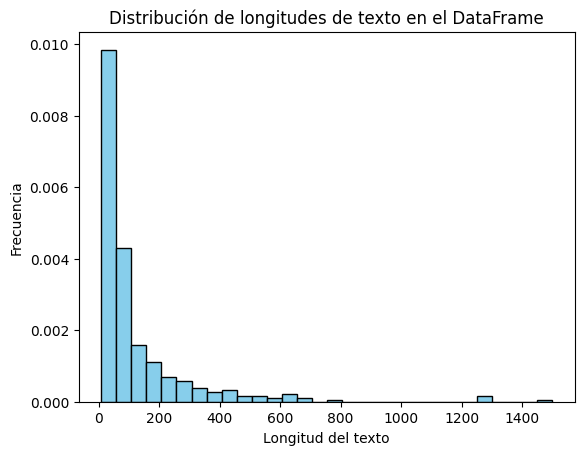

In [16]:
distribucionLongitudDataframe(df_filtrado, 0)

In [18]:
dataframe

filtro = dataframe['text'].str.contains(r'[a-zA-Z´¨\'`]*=')


In [19]:
filtro

0         False
1         False
2         False
3         False
4         False
          ...  
149260    False
149261    False
149262    False
149263    False
149264    False
Name: text, Length: 149265, dtype: bool

In [20]:
resultado = dataframe[filtro]

In [22]:
len(resultado)

15698

In [25]:
print(resultado['text'])


6          I1: Pues cebada, trigo, máiz=maíz, remolacha,...
12         I1: Bah, los chavales que van ahora a la escu...
32         I1: ¿Qué cambiaría? Pues en trabajar mucho me...
34                   I1: No, yo pa=para estudiar no valgo. 
44         I1: Sí, vaya, yo vine aquí con cinco años, pe...
                                ...                        
149192     I1:  Por ejemplo,  si habían… unas hojas de| ...
149197     I1: Sí, mi niño. [HS ¿Sí?] Sí, adentro. Espér...
149198     I2: [PS:16''] Pues nos hamos=hemos estao un r...
149217     I1: Nunca pensé yo de llegar a Venezuela. No....
149230     I1: Que yo… [HS Que esto iba a ser así.]  A… ...
Name: text, Length: 15698, dtype: object


In [26]:
resultado['text'].to_csv('regionalismos.csv', index=True)
